In [1]:
import re, os
import unicodedata
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import nltk.sentiment

from wordcloud import WordCloud

from acquire_c import *
from prepare_c import *
from explore_c import *

plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-darkgrid')

## Acquire data and find the dominant language in each row

In [2]:
# You can pass a threshold argument but the default is 75
lang = 'javascript'
not_lang = f'not_{lang}'
df = get_readme_data(lang=lang, lang_threshold=75, z_cutoff=0)
df.prog_lang.value_counts()

Python        4085
JavaScript    2941
Java          1031
HTML           769
TypeScript     568
              ... 
Roff             1
SQLPL            1
AGS Script       1
Bluespec         1
Pascal           1
Name: prog_lang, Length: 101, dtype: int64

In [3]:
# Split the data 
train, test = split(df)
# Send the train data
java_obj = NLP_explore(train, 'label', 'cleaned', lang, not_lang)

## Explore

### Look at word freqencies for JavaScript
|          |   word_count |
|:---------|-------------:|
| data     |        25128 |
| use      |        20312 |
| gt       |        19874 |
| yes      |        19795 |
| code     |        18020 |
| python   |        17961 |
| using    |        17762 |
| top      |        16057 |
| project  |        15087 |
| 1        |        13589 |
| run      |        13366 |
| api      |        12797 |
| unknown  |        12742 |
| github   |        12660 |
| file     |        12109 |
| learning |        11736 |
| open     |        11354 |
| app      |        11260 |
| create   |        10836 |
| 2        |        10439 |

In [4]:
# print(pd.DataFrame({'word_count': java_obj.all_freq}).head(20).to_markdown())

## Look at some word count visualizations

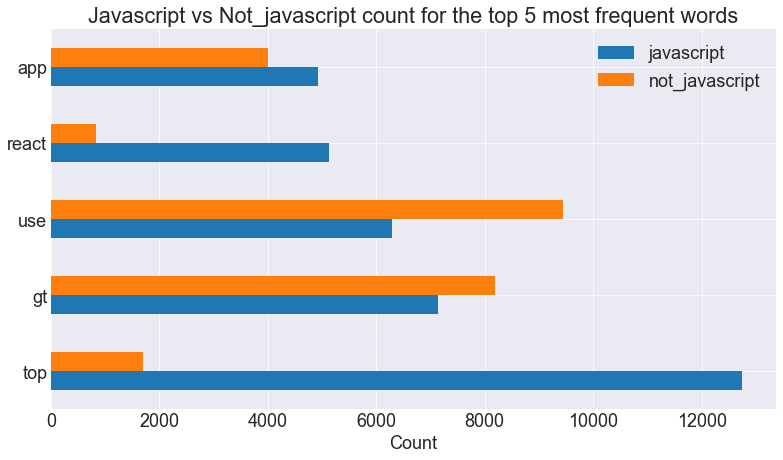

<Figure size 1152x648 with 0 Axes>

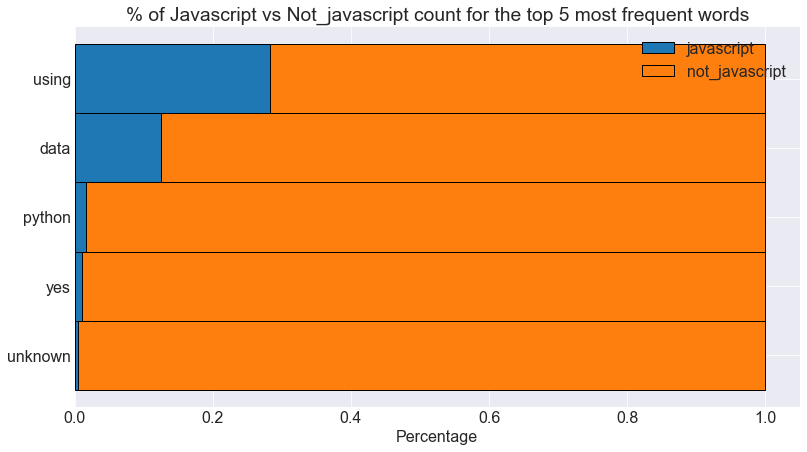

In [5]:
# Looking at just JavaScript hplot
java_obj.hplot_word_freq_viz(n=5, sort=lang)
# Looking at just JavaScript bplot stacked
java_obj.stacked_bplot_freq(n=5, sort=not_lang)

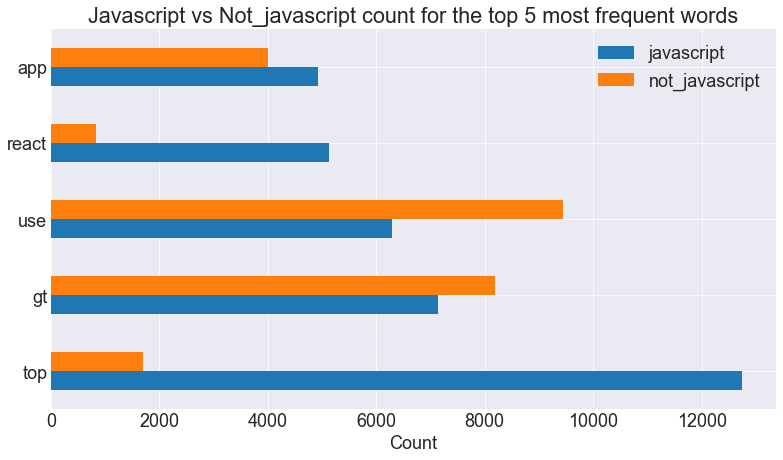

<Figure size 1152x648 with 0 Axes>

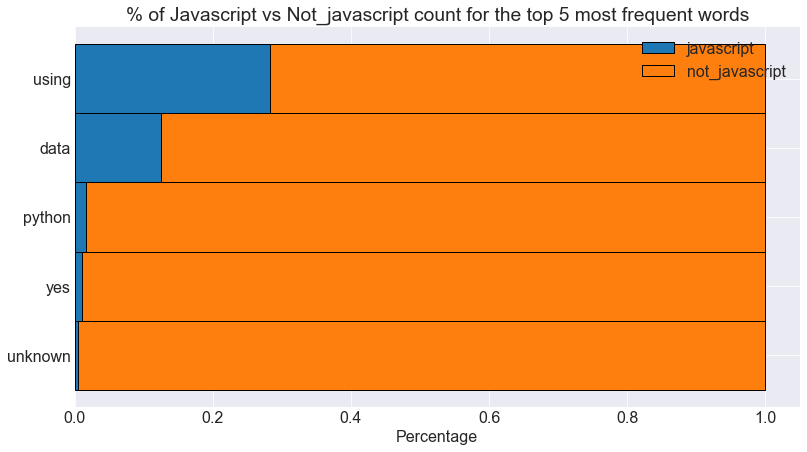

In [6]:
# Looking at just not_JavaScript hplot
java_obj.hplot_word_freq_viz(n=5, sort=lang)
# Looking at just not_JavaScript bplot stacked
java_obj.stacked_bplot_freq(n=5, sort=not_lang)

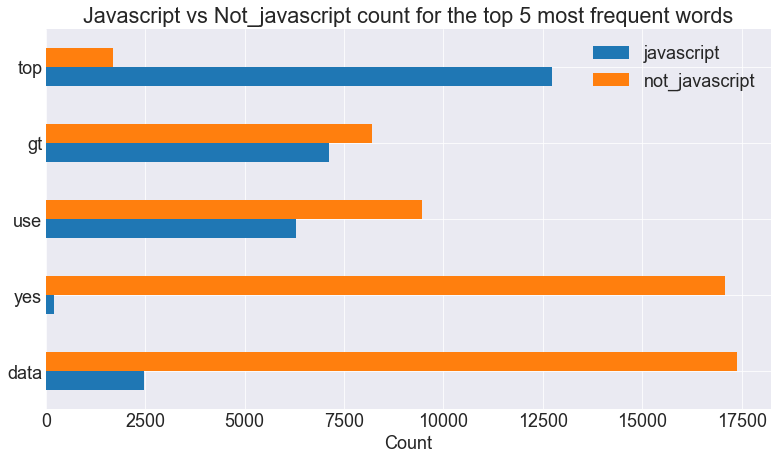

<Figure size 1152x648 with 0 Axes>

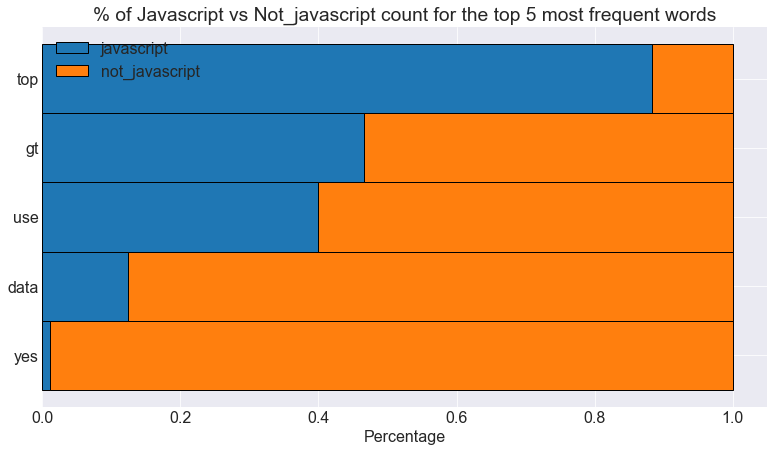

In [7]:
# Looking at just all hplot
java_obj.hplot_word_freq_viz(n=5)
# Looking at just all bplot stacked
java_obj.stacked_bplot_freq(n=5)

## Look at N-Grams Visualizations

### Look at Bigrams

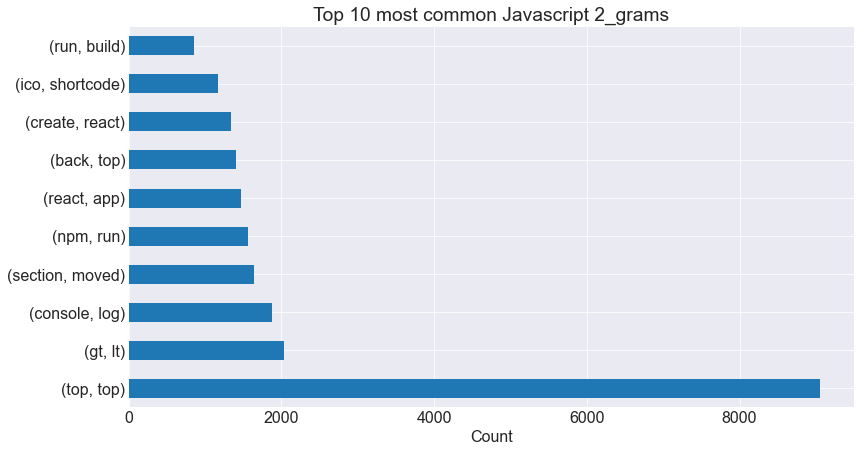

In [8]:
java_bigram = java_obj.n_gram(top_n= 10, col=lang)

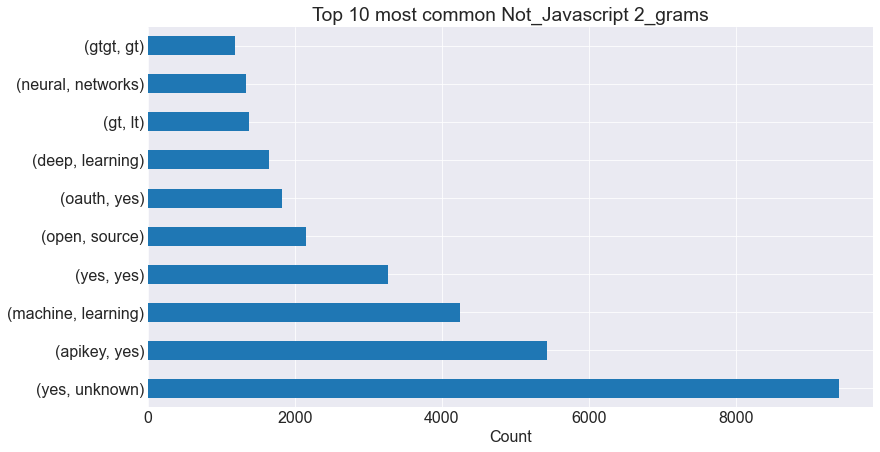

In [9]:
not_java_bigram = java_obj.n_gram(top_n = 10, col=not_lang)

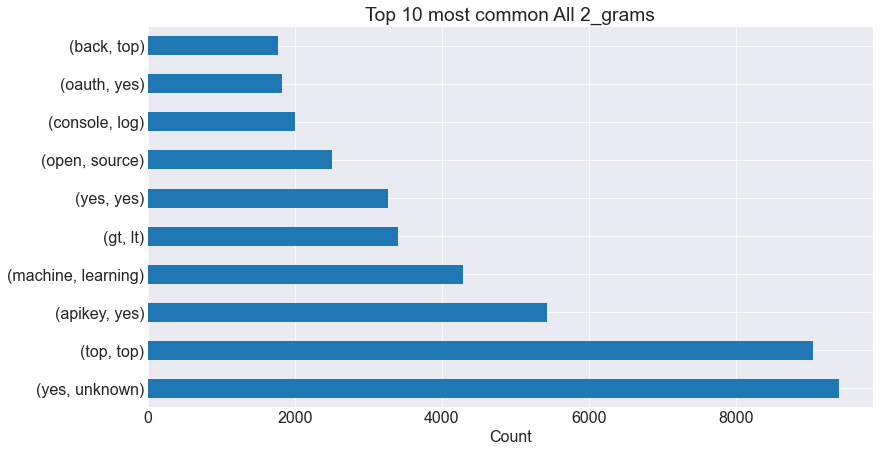

In [10]:
both_bigrams = java_obj.n_gram(top_n=10)

### Look at trigrams

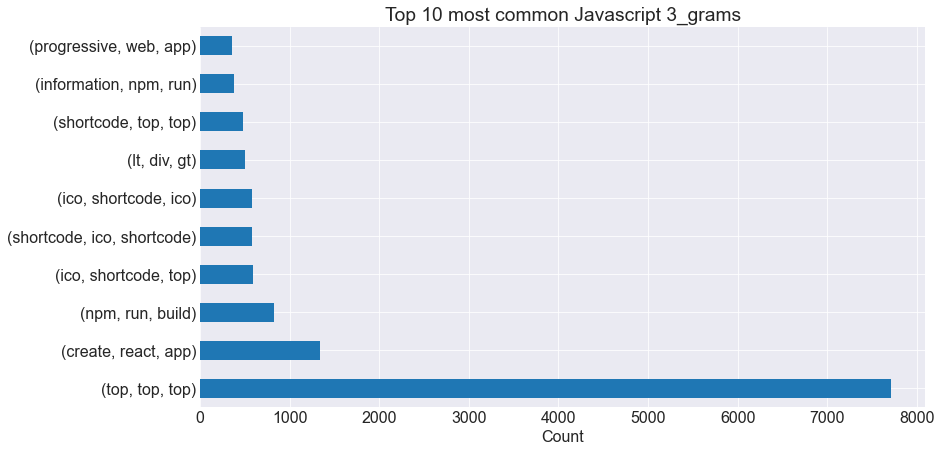

In [11]:
java_trigram = java_obj.n_gram(n=3, top_n=10, col=lang)

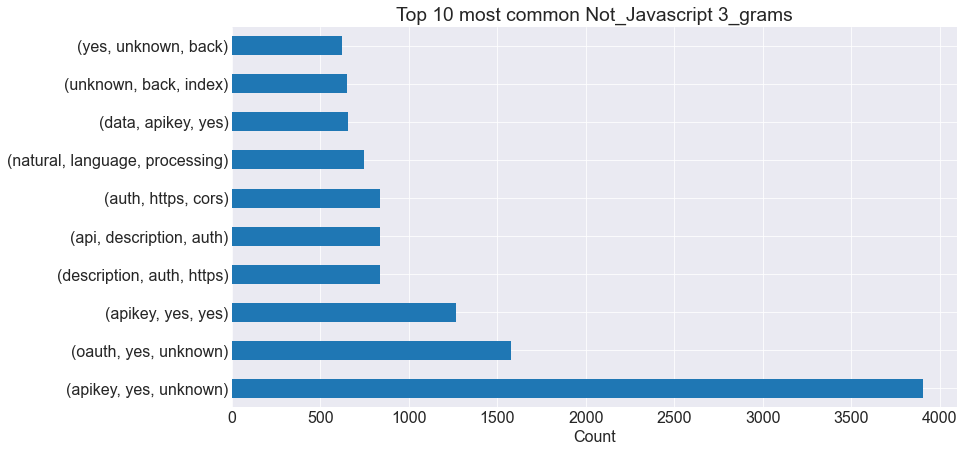

In [12]:
not_java_trigram = java_obj.n_gram(n=3, top_n=10, col=not_lang)

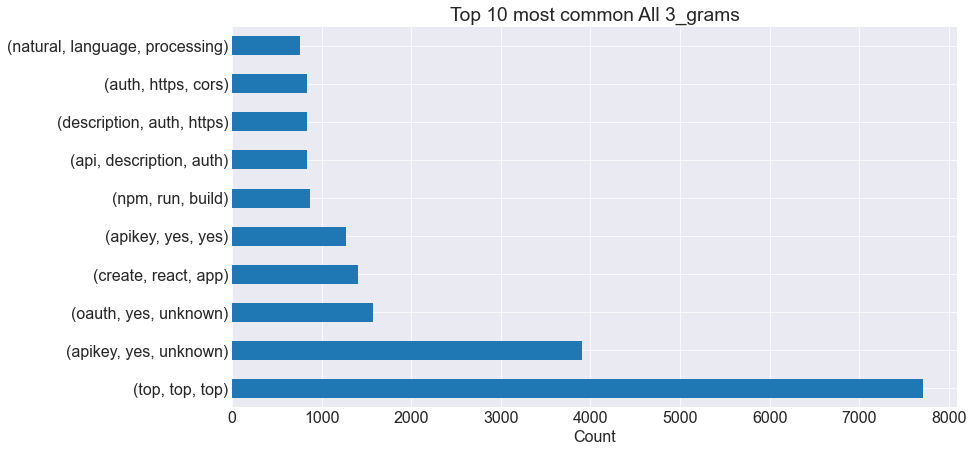

In [13]:
all_trigram = java_obj.n_gram(n=3, top_n=10)

### Plot some wordclouds

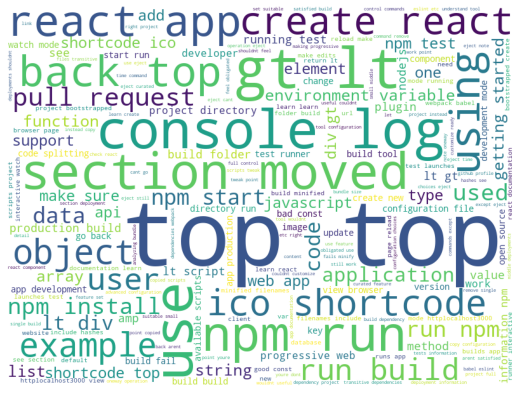

In [14]:
java_obj.plot_wordcloud(col=lang)

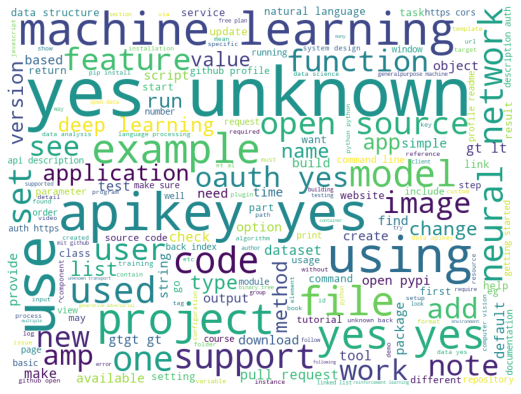

In [15]:
java_obj.plot_wordcloud(col=not_lang)

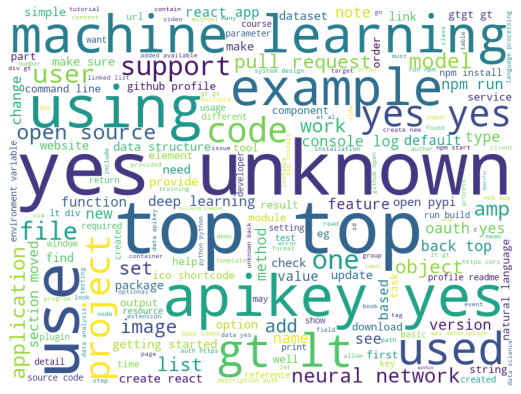

In [16]:
java_obj.plot_wordcloud()

## Add some sentiment analysis and some features

In [ ]:
# Add sentiment analysis
java_obj.add_sentiment_analysis()
# Add features
java_obj.add_features()

java_obj.df.head()

## Sentiment analysis bivariate plots

In [ ]:
java_obj.sentiment_bivariate_plots()

## Sentiment distribution plots

In [ ]:
java_obj.sentiment_distributions()

In [ ]:
%%html
<style>
table {margin-left: 0 !important;}
</style>